# Introduction to regression models

Import relevant libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Load data

In [39]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [40]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

In [41]:
print(wine_df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [42]:
print(wine_df.shape)

(1599, 12)


In [43]:
display(wine_df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
print(wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [45]:
doublons = wine_df.duplicated()
display(wine_df[doublons])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [46]:
display(wine_df.drop_duplicates())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [47]:
display(wine_df.corr())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


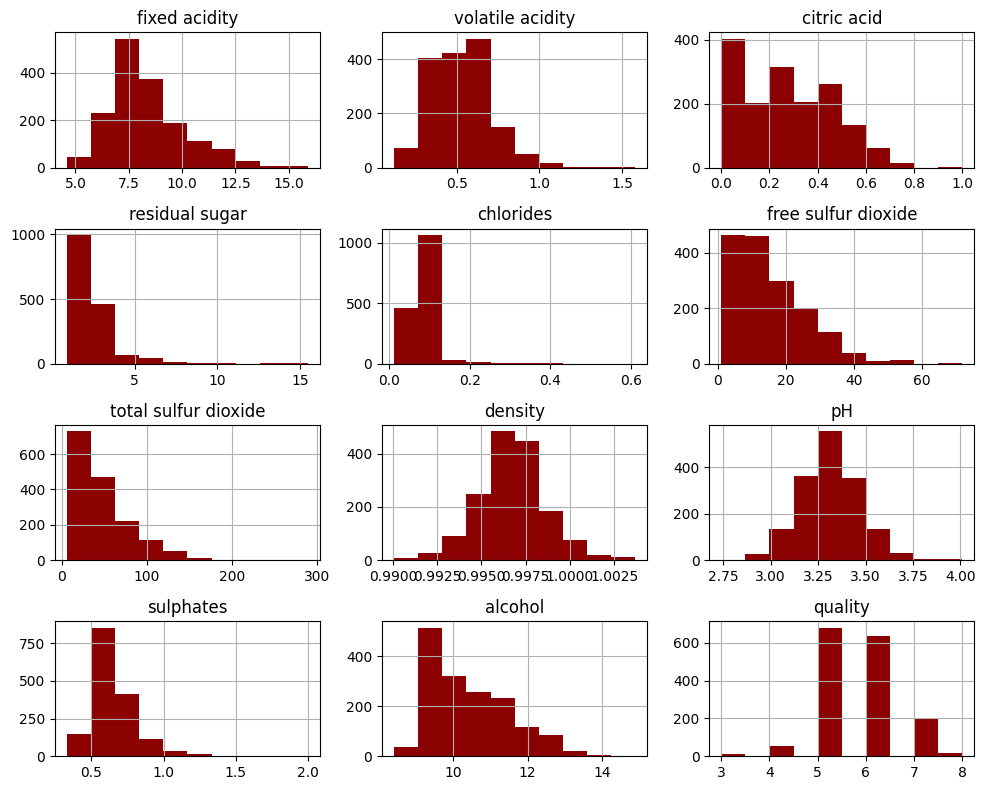

In [48]:
wine_df.hist(figsize=(10, 8), color='#8B0000')
plt.tight_layout()
plt.show()

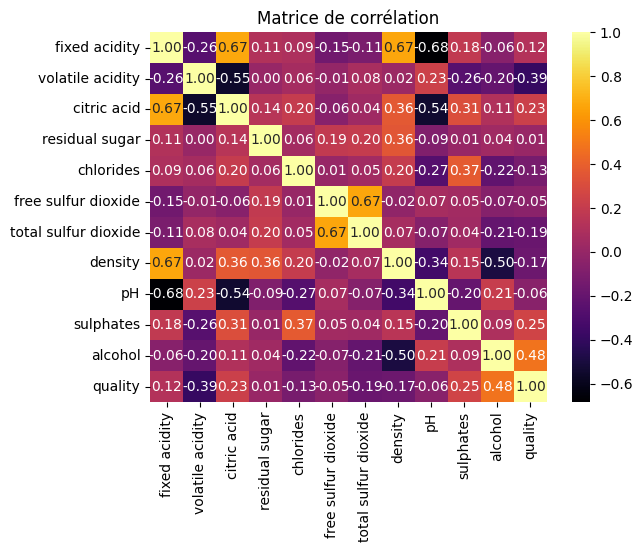

In [49]:
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

<p><b>fixed acidity > citric acidity | fixed > density | free sulfur > total sulfur & total sulfur > free sulfur</b> : Corrélation relativement forte de 0.67</p>
<p><b>alcohol > quality & inversement</b> : Correlation modéré de 0.48</p>
<p><b>pH > fixed acidity & inversement</b> : Correlation negative de -0.68</p>
<p><b>density > fixed acidity</b> : Correlation negative de -0.68</p>

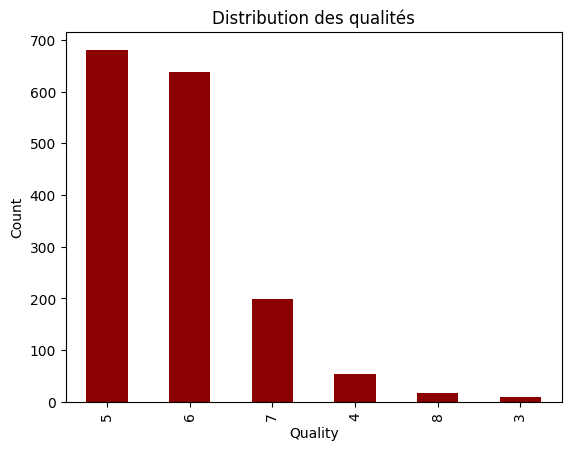

In [50]:
wine_df['quality'].value_counts().plot(kind='bar', color='#8B0000')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution des qualités')
plt.show()

<p>Target : qualité du vin pour producteur</p>
<p>Features : composition du vin puisque chaque colonne est codépendante</p>

## Create your own linear model

Get 100 samples with random state (seed) = 1

In [51]:
seed_value = 1
np.random.seed(seed_value)

wine_samples = wine_df.sample(n=100, random_state=seed_value)
display(wine_samples)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


Plot pH in function of fixed acidity

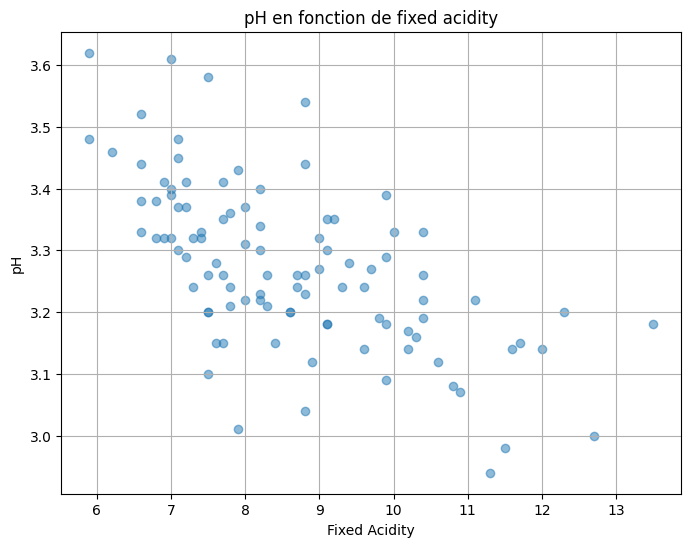

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(wine_samples['fixed acidity'], wine_samples['pH'], alpha=0.5)
plt.title('pH en fonction de fixed acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.grid(True)
plt.show()

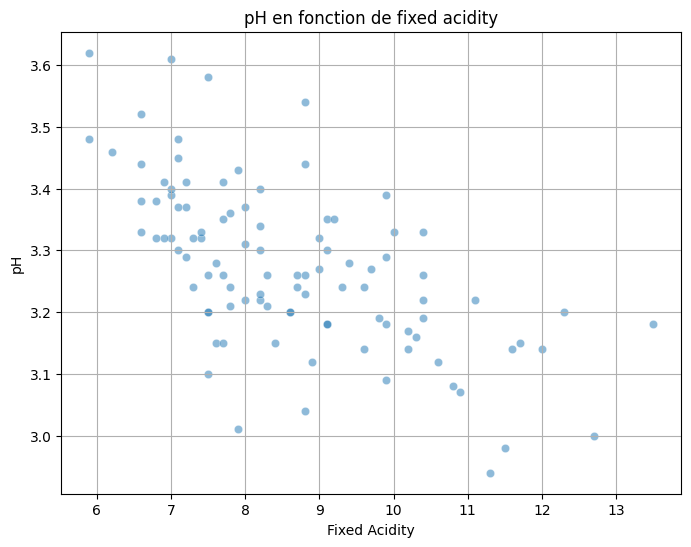

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_samples, x='fixed acidity', y='pH', alpha=0.5)
plt.title('pH en fonction de fixed acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.grid(True)
plt.show()

What can you say about pH and fixed acidity? are they correlated ? 

Il y a un relation apparente avec une corrélation negative. Coefficient de corrélation de -0.68

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

Intercept:  4.141414141414142
Pentes:  -0.10101010101010033
Distance : 10.365151515151496


<AxesSubplot:>

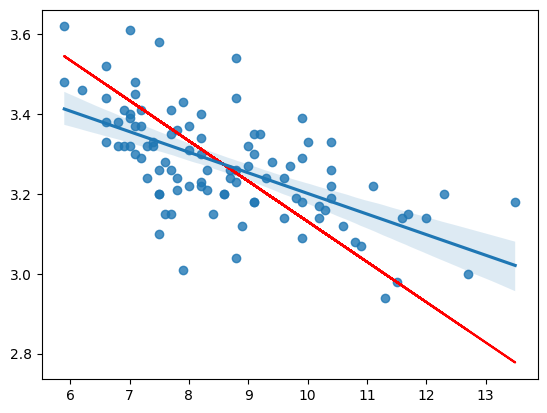

In [54]:
def somme_point(x, y, slope, intercept):
    pred_y = slope * x + intercept
    distances = np.abs(y-pred_y)
    return np.sum(distances)

x = wine_samples['fixed acidity'].values
y = wine_samples['pH'].values

best_slope = 0
best_intercept = 0
min_distance = float("inf")

for slope in np.linspace(-10, 10 , 100):
    for intercept in np.linspace(-10, 10, 100):
        distance = somme_point(x,y,slope, intercept)
        if distance < min_distance:
            best_slope = slope
            best_intercept = intercept
            min_distance = distance 
            
            
print("Intercept: ", best_intercept)
print("Pentes: ", best_slope)
print("Distance :", min_distance)
plt.plot(x, best_slope * x + best_intercept, color="red")
sns.regplot(x=x,y=y)

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [59]:
import numpy as np

X = wine_samples['fixed acidity'].values
y = wine_samples['pH'].values

b1_debase = -0.1
b0_range = np.linspace(2, 6, 300)  

def predict(x, b0, b1):
    return b0 + b1 * x

def calculate_error(y, y_pred):
    return np.sum((y - y_pred) ** 2)

errors = []

for b0 in b0_range:
    y_pred = predict(X, b0, b1_debase)
    error = calculate_error(y, y_pred)
    errors.append(error)

min_error_index = np.argmin(errors)
b0_debase_optimal = b0_range[min_error_index]


b0_debase_optimal, errors[min_error_index]

(4.1404682274247495, 1.6842901511168793)

In [60]:
# 2

b1_range = np.linspace(-1,1, 300)
errors = []

for b1 in b1_range:
    y_pred = predict(X, b0_debase_optimal, b1) 
    error = calculate_error(y, y_pred)
    errors.append(error)

min_error_index = np.argmin(errors)
b1_optimal = b1_range[min_error_index]

b1_optimal, errors[min_error_index]  

(-0.09698996655518399, 1.7082163432176385)

In [61]:
# 3
b0_new_range = np.linspace(3.7, 4.3, 300)

errors = []  

for b0 in b0_range:
    y_pred = predict(X, b0, b1_debase)
    error = calculate_error(y, y_pred)
    errors.append(error)

min_error_index = np.argmin(errors)
b0_new = b0_new_range[min_error_index]

b0_new, errors[min_error_index]

(4.021070234113712, 1.6842901511168793)

In [62]:
# 4
b1_range = np.linspace(-0.1, 0, 300)
errors = []

for b1 in b1_range:
    y_pred = predict(X, b0_debase_optimal, b1) 
    error = calculate_error(y, y_pred)
    errors.append(error)

min_error_index = np.argmin(errors)
b1_new = b1_range[min_error_index]

b1_new, errors[min_error_index]  

(-0.09899665551839465, 1.676782399525734)

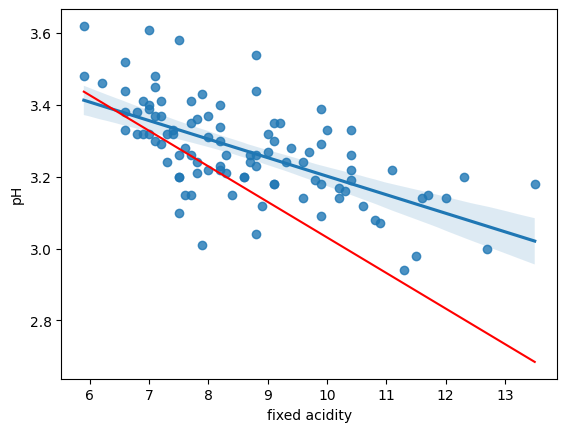

In [66]:
sns.regplot(y='pH', x='fixed acidity', data=wine_samples);
x_values = np.linspace(wine_samples['fixed acidity'].min(), wine_samples['fixed acidity'].max(), 100)

y_values = predict(x_values, b0_new, b1_new)
plt.plot(x_values, y_values, color="red", label='Manual Regression Line')

Compare to seaborn regplot

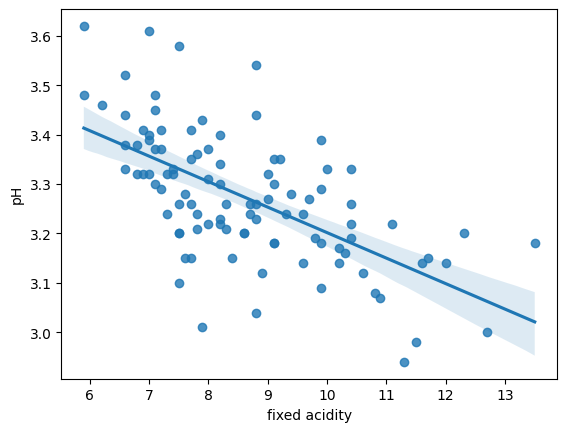

In [67]:
sns.regplot(y='pH', x='fixed acidity', data=wine_samples);

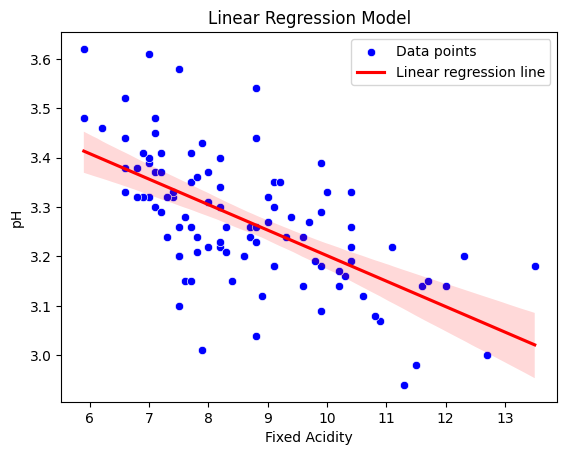

In [68]:
# plot your linear model with regplot and compare

x = wine_samples['fixed acidity'].values
y = wine_samples['pH'].values

sns.scatterplot(x=x, y=y, color='blue', label='Data points')

sns.regplot(x=x, y=y, scatter=False, color='red', label='Linear regression line')

plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

How far is your linear model from seaborn model?

In [94]:
def lin_regres(X, y, initial_b0, num_iterations=1000, step_size=0.01):
    b0 = initial_b0
    b1 = 0
    
    def calculate_error(y, y_pred):
        return np.sum((y - y_pred) ** 2)
    
    errors = []
    for b1_new in np.linspace(-10, 10, 100):
        y_pred = b0 + b1_new * X
        error = calculate_error(y, y_pred)
        errors.append(error)
    best_b1 = np.linspace(-10, 10, 100)[np.argmin(errors)]
    
    errors = []
    for b0_new in np.linspace(-10, 10, 100):  
        y_pred = b0_new + best_b1 * X
        error = calculate_error(y, y_pred)
        errors.append(error)
    best_b0 = np.linspace(-10, 10, 100)[np.argmin(errors)]
    
    return best_b0, best_b1

X = wine_samples['fixed acidity']
y = wine_samples['pH']
initial_b0 = 0

best_b0, best_b1 = lin_regres(X, y, initial_b0)
print(best_b0)
print(best_b1)

0.7070707070707076
0.30303030303030276


<i>1000 itérations 0.7 Inter nop</i>

How do you evaluate the performance of your linear models at each iteration ?

<i>la precision vient progressivement en diminuant la plage</i>

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

In [69]:
def calculate_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def find_best_slope_intercept(X, y, initial_intercept, slope_range):
    best_error = float('inf')
    best_slope = None
    best_intercept = None
    
    for slope in slope_range:
        y_pred = X * slope + initial_intercept
        error = calculate_error(y, y_pred)
        
        if error < best_error:
            best_error = error
            best_slope = slope
    
    for intercept in np.linspace(-10, 10, 100):
        y_pred = X * best_slope + intercept
        error = calculate_error(y, y_pred)
        
        if error < best_error:
            best_error = error
            best_intercept = intercept
    
    return best_slope, best_intercept, best_error

x = wine_samples['fixed acidity'].values
y = wine_samples['pH'].values
initial_intercept = 0
slope_range = np.linspace(-10, 10, 100)

best_slope, best_intercept, best_error = find_best_slope_intercept(X, y, initial_intercept, slope_range)
print("Best slope:", best_slope)
print("Best intercept:", best_intercept)
print("Best error:", best_error)

Best slope: 0.30303030303030276
Best intercept: 0.7070707070707076
Best error: 0.33308841883481205


How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

2.639925175331145
745.5793


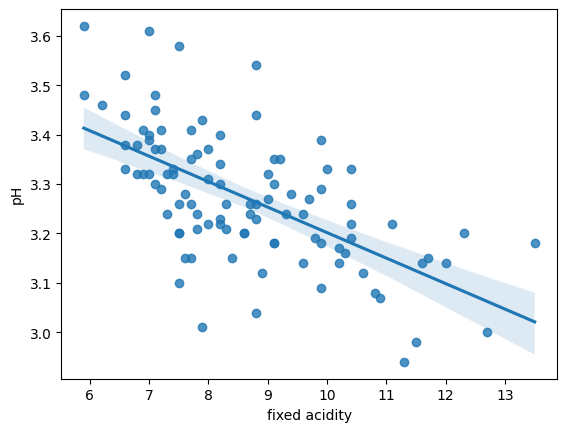

In [77]:
y_pred_custom = b0 + b1 * X
sse_custom = np.sum((y - y_pred_custom) ** 2)
y_pred_seaborn = sns.regplot(y='pH', x='fixed acidity', data=wine_samples).get_lines()[0].get_ydata()[0:len(X)]
sse_seaborn = np.sum((y - y_pred_seaborn) ** 2)

print(sse_seaborn)
print(sse_custom)

In [95]:
y_pred_custom = X * best_slope + best_intercept

rmse_custom = calculate_error(y, y_pred_custom)

rmse_seaborn = calculate_error(y, y_pred_seaborn)

# Afficher les résultats
print("MSE de votre modèle:", rmse_custom)
print("MSE du modèle Seaborn:", rmse_seaborn)

MSE de votre modèle: 0.33308841883481205
MSE du modèle Seaborn: 5.6945119923005345


<i>Les résultats suggèrent que le modèle Seaborn a de meilleures performances, avec une erreur moyenne plus faible par rapport aux vraies valeurs des données et par rapport au modèle. Cela signifie que le modèle Seaborn est plus proche des données que notre modèle.</>

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

In [79]:
import numpy as np

def ordinary_least_squares(X, y):
    X = np.column_stack((np.ones(len(X)), X))
    
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    intercept = beta[0]
    slope = beta[1]
    
    return slope, intercept

# Exemple d'utilisation :
X = wine_samples['fixed acidity']
y = wine_samples['pH']

best_slope_ols, best_intercept_ols = ordinary_least_squares(X, y)
print("Meilleure pente (OLS) :", best_slope_ols)
print("Meilleure ordonnée à l'origine (OLS) :", best_intercept_ols)

Meilleure pente (OLS) : -0.051601004727694924
Meilleure ordonnée à l'origine (OLS) : 3.717655463766902


Compare with the Linear regression used in scikit learn

In [80]:
# Import the model
from sklearn.linear_model import LinearRegression

X = wine_samples['fixed acidity']
y = wine_samples['pH']

# Redimensionner X en un tableau 2D
X_reshaped = X.values.reshape(-1, 1)  # -1 signifie que NumPy doit inférer la longueur de la dimension

# Instancier le modèle
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X_reshaped, y)

# Vérifier les résultats
# Pente du modèle (a)
print("Pente du modèle :", model.coef_)

# Ordonnée à l'origine du modèle (b)
print("Ordonnée à l'origine du modèle :", model.intercept_)

Pente du modèle : [-0.051601]
Ordonnée à l'origine du modèle : 3.7176554637668797


Are you close to these values ?

<i> Les valeurs sont idendiques </i>

How do you interpret these values? What do they say about the pH and fixed acidity?

<p><i>A mesure que l'acidité fixe augmente, le pH tend à diminuer en moyenne de -0.051601 unités.</i></p>
<p><i>Si l'acidité fixe était nulle, le pH serait d'environ 3.72</i></p>

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [81]:
seed_value = 60
np.random.seed(seed_value)

wine_samples_2 = wine_df.sample(n=100, random_state=seed_value)
display(wine_samples_2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

<i>Parfois, les modèles apprennent tellement bien les données avec lesquelles ils ont été entraînés qu'ils ne savent pas comment se débrouiller avec de nouvelles données. C'est ce qu'on appelle le surajustement. C'est comme si le modèle était trop spécialisé et ne pouvait pas s'adapter à de nouvelles situations.</i>

In [116]:
model = LinearRegression()

X_new = wine_samples_2[['fixed acidity']]
y_new = wine_samples_2['pH']

model.fit(X_new, y_new)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: -0.07687905288139371
Intercept: 3.9588041512911536


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


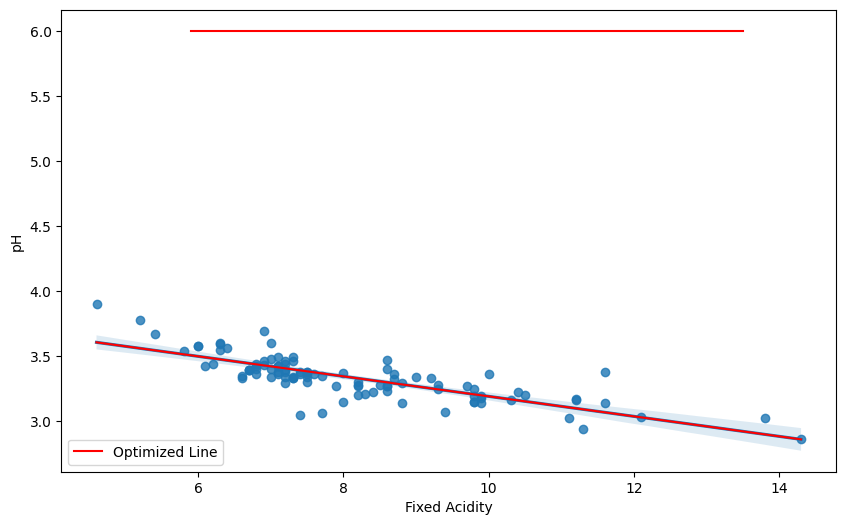

In [117]:
X_plot = np.linspace(X_new.min(), X_new.max(), 100)
y_plot = model.predict(X_plot)

plt.figure(figsize=(10, 6))
sns.regplot(x='fixed acidity', y='pH', data=wine_samples_2)
plt.plot(X_plot, y_plot, color='red')
plt.plot(X_vals, y_vals, color='red', label='Optimized Line')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend()
plt.show()

How can you solve the problem ?

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [84]:
# Choix de la graine pour la reproductibilité
seed = 42

# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = wine_df[['pH']]
y = wine_df['quality']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error):", mse)
print("R^2 Score:", r2)


MSE (Mean Squared Error): 0.6521061050664506
R^2 Score: 0.002141915467886002


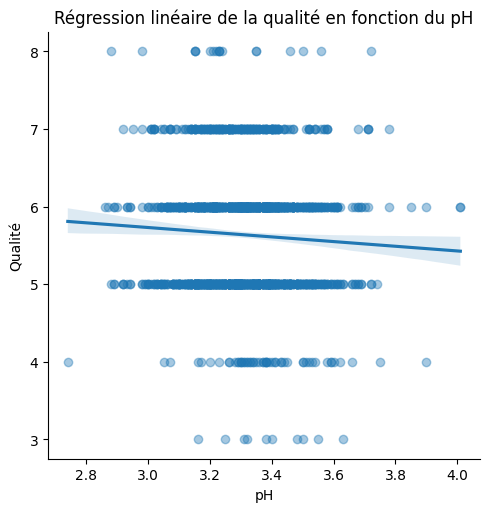

In [118]:
# Visualisation du modèle linéaire avec seaborn
sns.lmplot(x='pH', y='quality', data=wine_df, scatter_kws={'alpha': 0.4})
plt.title('Régression linéaire de la qualité en fonction du pH')
plt.xlabel('pH')
plt.ylabel('Qualité')
plt.show()

In [ ]:
modele = LinearRegression()


# Ajuster le modèle à vos données
modele.fit(X, y)

# Obtenir les coefficients et l'intercept du modèle
coef = modele.coef_[0]  # Coefficient (ou pente) de la régression linéaire
intercept = modele.intercept_  # Intercept de la régression linéaire

# Faites des prédictions avec les coefficients de scikit-learn
y_pred_sklearn = intercept + coef * X

# Tracez les prédictions avec le nouveau jeu de données
sns.scatterplot(x=X.flatten(), y=y, label='Données réelles (nouveau jeu de données)')
sns.lineplot(x=X.flatten(), y=y_pred_sklearn, color='red', label='Prédictions de scikit-learn')

# Ajoutez des labels et une légende
plt.title('Comparaison des prédictions de scikit-learn avec un nouveau jeu de données')
plt.xlabel('Caractéristiques')
plt.ylabel('Cible')
plt.legend()

# Montrez le tracé
plt.show()

How good is this model performing? What is the error? is it low or high ?

<i>Ces résultats confirment que la régression linéaire ne s'ajuste pas bien aux données et que la performance du modèle est très faible. </i>

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [119]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = wine_samples_2[['fixed acidity']]
y = wine_samples_2['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.043139473826452335

<i>Le modèle est moins performant que la moyenne des valeurs.</i>

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


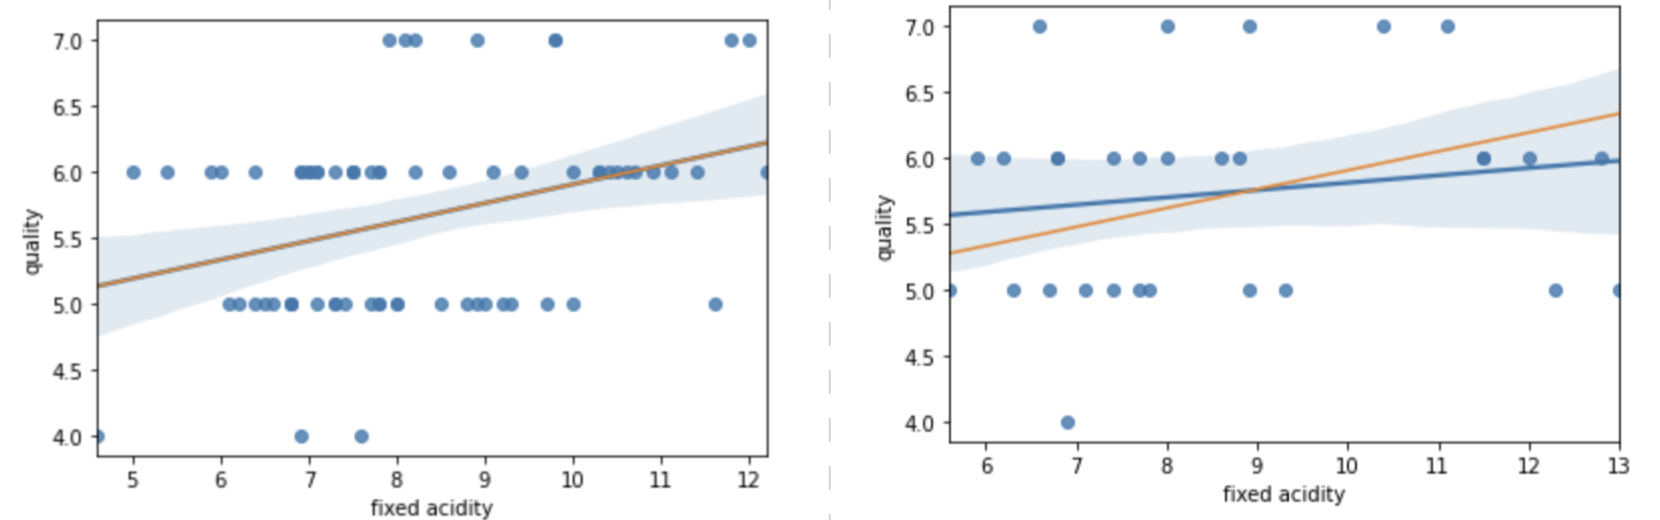

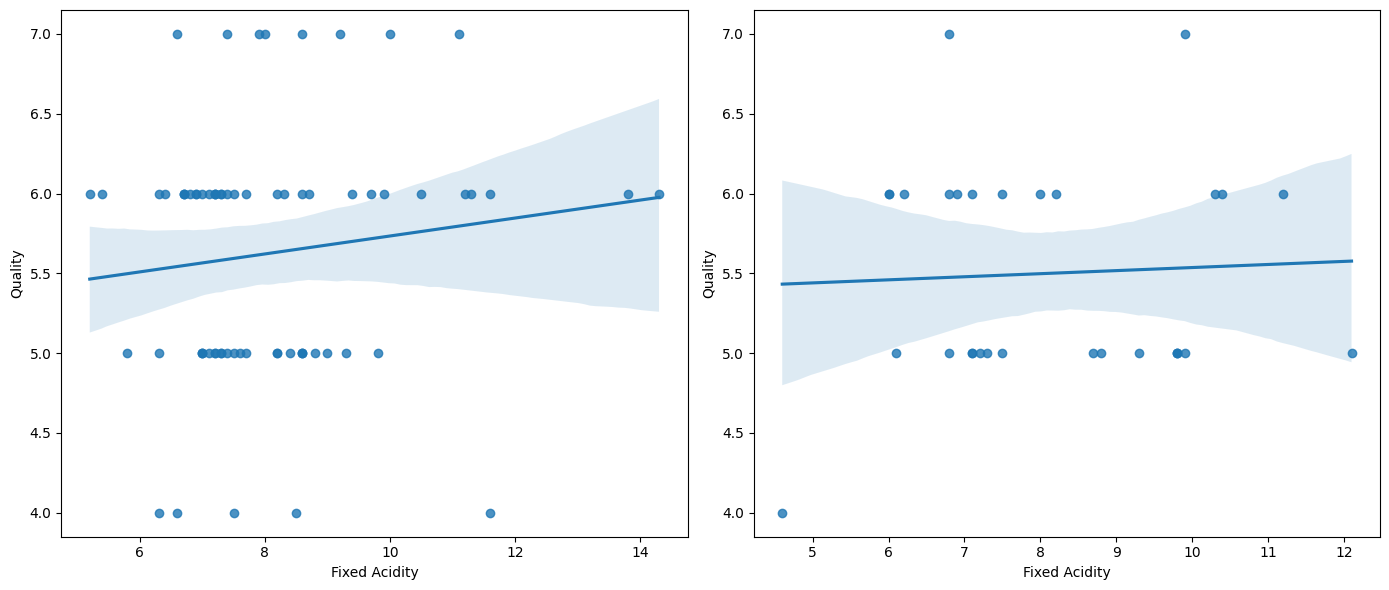

In [128]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=X_train.squeeze(), y=y_train, data= wine_samples_2)
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')


plt.subplot(1, 2, 2)
sns.regplot(x=X_test.squeeze(), y=y_test, data= wine_samples_2)
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')


plt.tight_layout()
plt.show()

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

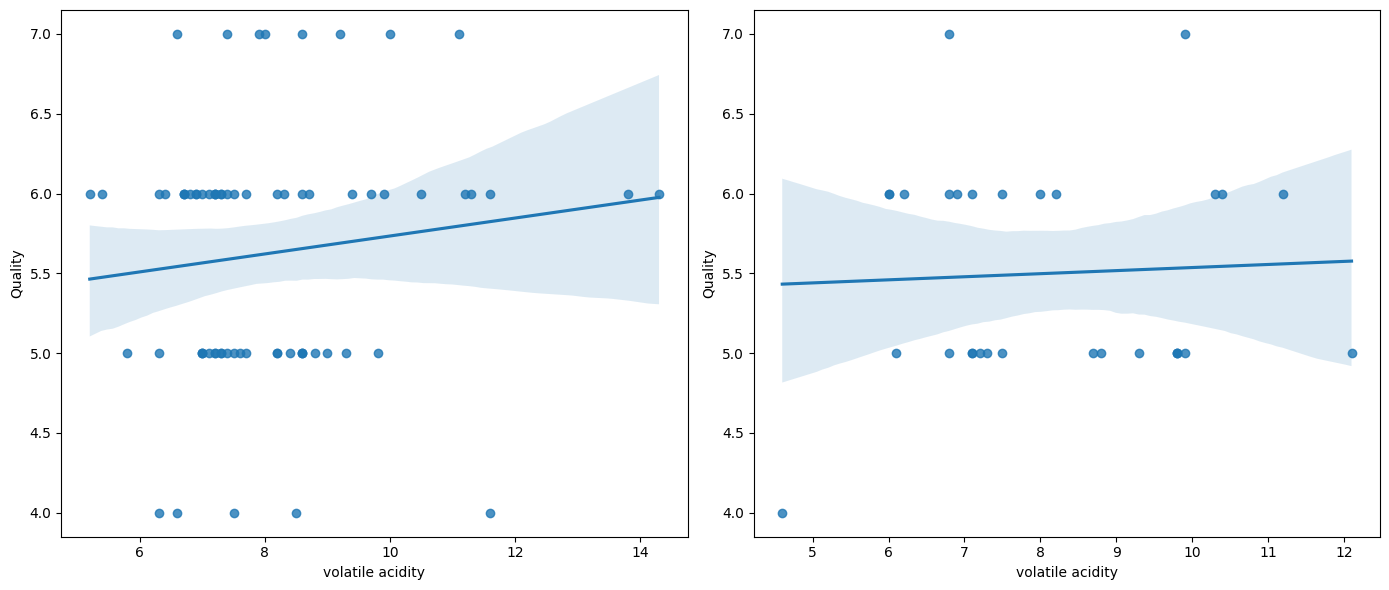

In [126]:
X = wine_samples_2[['volatile acidity']]
y = wine_samples_2['quality']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=X_train.squeeze(), y=y_train, data= wine_samples_2)
plt.xlabel('volatile acidity')
plt.ylabel('Quality')


plt.subplot(1, 2, 2)
sns.regplot(x=X_test.squeeze(), y=y_test, data= wine_samples_2)
plt.xlabel('volatile acidity')
plt.ylabel('Quality')


plt.tight_layout()
plt.show()

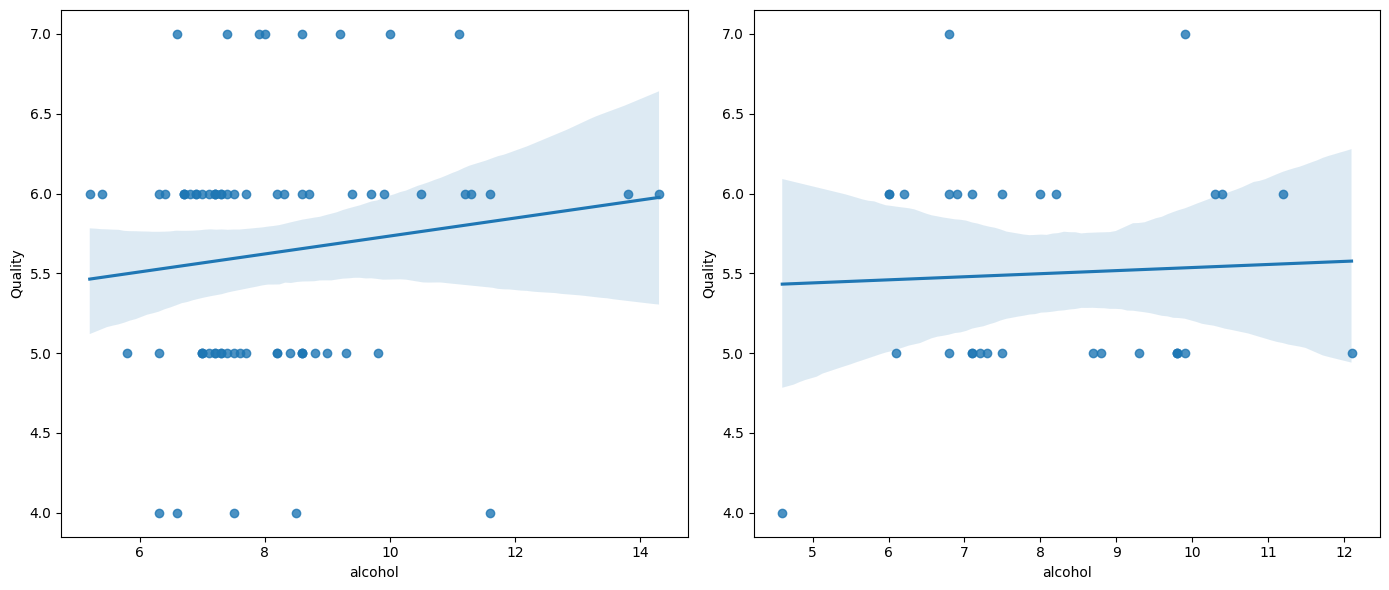

In [129]:
X = wine_samples_2[['alcohol']]
y = wine_samples_2['quality']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=X_train.squeeze(), y=y_train, data= wine_samples_2)
plt.xlabel('alcohol')
plt.ylabel('Quality')


plt.subplot(1, 2, 2)
sns.regplot(x=X_test.squeeze(), y=y_test, data= wine_samples_2)
plt.xlabel('alcohol')
plt.ylabel('Quality')


plt.tight_layout()
plt.show()

Do you think you can do better ?

<i>NOpe</i>

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [147]:
X = wine_samples[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
y = wine_samples[['quality']]

In [148]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Création du modèle de régression linéaire avec plusieurs fonctionnalités
model_multi = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model_multi.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_multi = model_multi.predict(X_test)

# Évaluation du modèle avec plusieurs fonctionnalités
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print("Performance du modèle avec plusieurs fonctionnalités :")
print("MSE (Mean Squared Error):", mse_multi)
print("R^2 Score:", r2_multi)

# Comparaison avec le modèle de régression simple
print("\nPerformance du modèle de régression simple :")
print("MSE (Mean Squared Error):", mse)
print("R^2 Score:", r2)

Performance du modèle avec plusieurs fonctionnalités :
MSE (Mean Squared Error): 0.16433751907645594
R^2 Score: 0.33601002393351165

Performance du modèle de régression simple :
MSE (Mean Squared Error): 0.6521061050664506
R^2 Score: 0.002141915467886002


Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [149]:
X2 = wine_samples
y = wine_samples[['quality']]

In [150]:
# Division des données en ensembles d'entraînement et de test
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=seed)

# Création du modèle de régression linéaire avec plusieurs fonctionnalités
model_multi = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model_multi.fit(X2_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_multi = model_multi.predict(X2_test)

# Évaluation du modèle avec plusieurs fonctionnalités
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print("Performance du modèle avec plusieurs fonctionnalités :")
print("MSE (Mean Squared Error):", mse_multi)
print("R^2 Score:", r2_multi)

# Comparaison avec le modèle de régression simple
print("\nPerformance du modèle de régression simple :")
print("MSE (Mean Squared Error):", mse)
print("R^2 Score:", r2)

Performance du modèle avec plusieurs fonctionnalités :
MSE (Mean Squared Error): 8.283039504820624e-31
R^2 Score: 1.0

Performance du modèle de régression simple :
MSE (Mean Squared Error): 0.6521061050664506
R^2 Score: 0.002141915467886002


If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

<div style="background-color: #6E0B26; padding: 10px;"><p style="color: white;"><i> l'ajout de la qualité de la colonne dans X peut entraîner des fuites de données et des résultats artificiellement élevés, ce qui faussera l'évaluation de la performance du modèle.</i></p></div>

In [144]:
X3 = wine_samples[['quality']]
y = wine_samples[['quality']]

In [145]:
# Division des données en ensembles d'entraînement et de test
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=seed)

# Création du modèle de régression linéaire avec plusieurs fonctionnalités
model_multi = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model_multi.fit(X3_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_multi = model_multi.predict(X3_test)

# Évaluation du modèle avec plusieurs fonctionnalités
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print("Performance du modèle avec plusieurs fonctionnalités :")
print("MSE (Mean Squared Error):", mse_multi)
print("R^2 Score:", r2_multi)

# Comparaison avec le modèle de régression simple
print("\nPerformance du modèle de régression simple :")
print("MSE (Mean Squared Error):", mse)
print("R^2 Score:", r2)

Performance du modèle avec plusieurs fonctionnalités :
MSE (Mean Squared Error): 0.0
R^2 Score: 1.0

Performance du modèle de régression simple :
MSE (Mean Squared Error): 0.6521061050664506
R^2 Score: 0.002141915467886002


<div style="background-color: #6E0B26; padding: 10px;"><p style="color: white;"><i>Les résultats indiquent qu'en utilisant plusieurs fonctionnalités (colonnes) ou la seule colonne 'quality', les modèles ont une performance presque parfaite (R^2 = 1,0 et MSE proche de zéro). Cela suggère que ces modèles peuvent être surajustés ou que la sélection de colonnes est efficace dans la prédiction. Cependant, les modèles de régression simple n'obtiennent pas de bonnes performances (faible R^2 et MSE plus élevé), ce qui signifie que les caractéristiques supplémentaires sont nécessaires pour une bonne prédiction.</i></p></div>

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

In [151]:
# Modèle avec quelques fonctionnalités (X)
X = wine_samples[['pH', 'alcohol', 'fixed acidity', 'density', 'chlorides']]
y = wine_samples[['quality']]

# Modèle avec l'ensemble des données (X2)
X2 = wine_samples
y2 = wine_samples[['quality']]

# Modèle avec la seule colonne 'quality' (X3)
X3 = wine_samples[['quality']]
y3 = wine_samples[['quality']]

# Fonction pour évaluer un modèle de régression
def eval_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Évaluation du modèle avec X
mse_X, r2_X = eval_model(X, y)
print(f"Performance du modèle avec quelques fonctionnalités :")
print(f"MSE : {mse_X}, R^2 : {r2_X}")

# Évaluation du modèle avec X2
mse_X2, r2_X2 = eval_model(X2, y2)
print(f"\nPerformance du modèle avec l'ensemble des données :")
print(f"MSE : {mse_X2}, R^2 : {r2_X2}")

# Évaluation du modèle avec X3
mse_X3, r2_X3 = eval_model(X3, y3)
print(f"\nPerformance du modèle avec la seule colonne 'quality' :")
print(f"MSE : {mse_X3}, R^2 : {r2_X3}")


Performance du modèle avec quelques fonctionnalités :
MSE : 0.29483076959307075, R^2 : 0.3353679675539434

Performance du modèle avec l'ensemble des données :
MSE : 4.129686838831997e-30, R^2 : 1.0

Performance du modèle avec la seule colonne 'quality' :
MSE : 4.121798229779786e-31, R^2 : 1.0


In [154]:
# Fonction pour calculer l'importance des fonctionnalités
def calculate_feature_importance(X, y):
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    importance = model.feature_importances_
    features = X.columns
    importance_dict = dict(zip(features, importance))
    return importance_dict

# Calcul de l'importance des fonctionnalités pour chaque jeu de données
importance_X = calculate_feature_importance(X, y)
importance_X2 = calculate_feature_importance(X2, y2)
importance_X3 = calculate_feature_importance(X3, y3)

# Affichage des importances des fonctionnalités
print("Importance des fonctionnalités pour le jeu de données 'X':")
for feature, importance in importance_X.items():
    print(f"{feature}: {importance}")

print("\nImportance des fonctionnalités pour le jeu de données 'X2':")
for feature, importance in importance_X2.items():
    print(f"{feature}: {importance}")

print("\nImportance des fonctionnalités pour le jeu de données 'X3':")
for feature, importance in importance_X3.items():
    print(f"{feature}: {importance}")

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Importance des fonctionnalités pour le jeu de données 'X':
pH: 0.17130443066579687
alcohol: 0.2931065205237094
fixed acidity: 0.16829453571926808
density: 0.17913462690384516
chlorides: 0.18815988618738047

Importance des fonctionnalités pour le jeu de données 'X2':
fixed acidity: 0.00044764627178804856
volatile acidity: 0.008731754263758133
citric acid: 0.0036083653861957933
residual sugar: 0.012565199790610236
chlorides: 0.003416599309912032
free sulfur dioxide: 0.0004131542565694125
total sulfur dioxide: 0.0024248045138985
density: 0.03088873495454204
pH: 0.00024956359893885674
sulphates: 0.00235772082800529
alcohol: 0.0003100651514345716
quality: 0.9345863916743471

Importance des fonctionnalités pour le jeu de données 'X3':
quality: 1.0


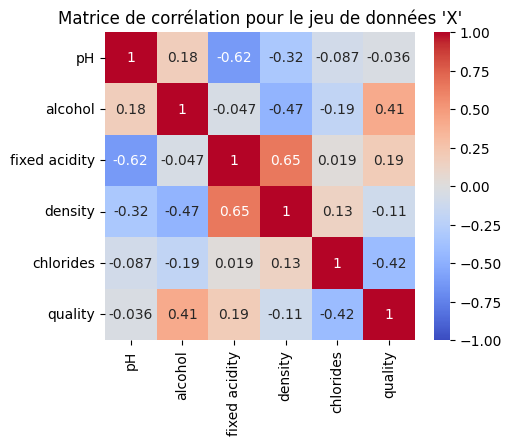

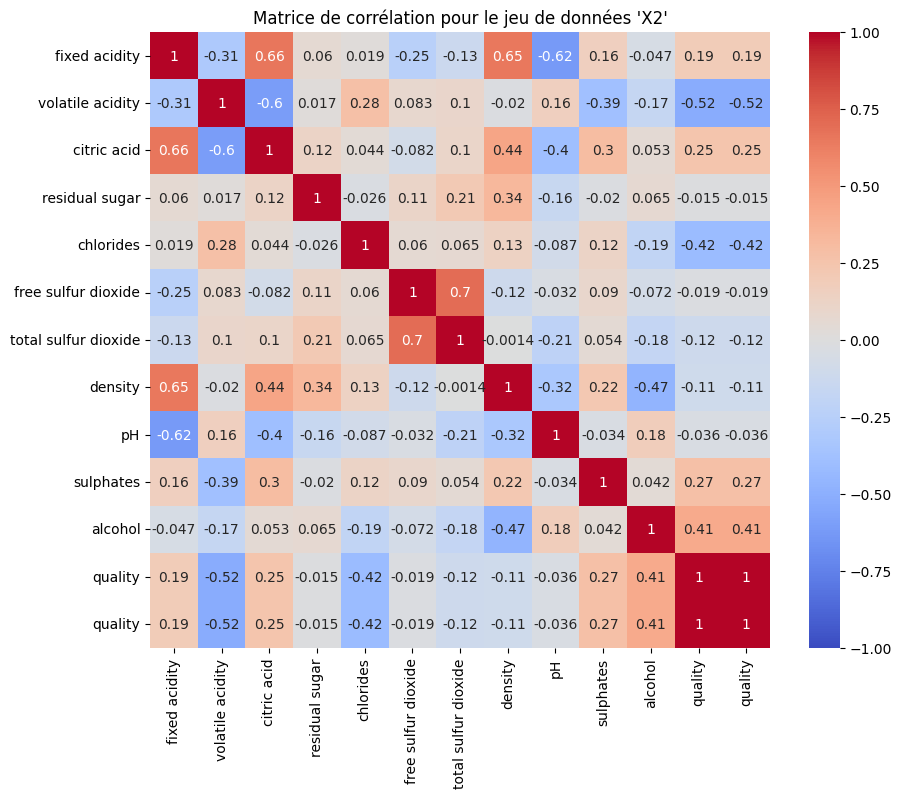

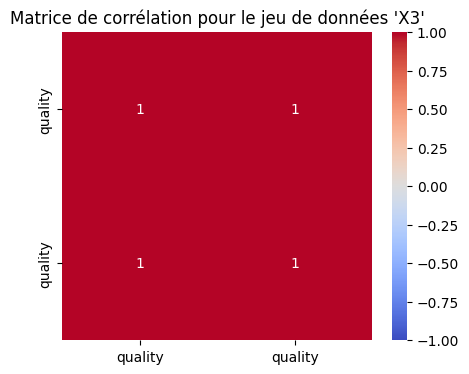

In [165]:
# Calcul de la matrice de corrélation pour 'X'
correlation_matrix_X = pd.concat([X, y], axis=1).corr()

# Créer une carte de chaleur pour 'X'
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix_X, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation pour le jeu de données 'X'")
plt.show()

# Calcul de la matrice de corrélation pour 'X2'
correlation_matrix_X2 = pd.concat([X2, y2], axis=1).corr()

# Créer une carte de chaleur pour 'X2'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_X2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation pour le jeu de données 'X2'")
plt.show()

# Calcul de la matrice de corrélation pour 'X3'
correlation_matrix_X3 = pd.concat([X3, y3], axis=1).corr()

# Créer une carte de chaleur pour 'X3'
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix_X3, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation pour le jeu de données 'X3'")
plt.show()

In [166]:
# Analyse de la corrélation entre les fonctionnalités et la variable cible

# Corrélation dans le jeu de données 'X'
correlation_X = X.corrwith(y['quality'])
print("Corrélation entre les fonctionnalités et la variable cible dans le jeu de données 'X':")
display(correlation_X)

# Corrélation dans le jeu de données 'X2'
correlation_X2 = X2.corrwith(y2['quality'])
print("\nCorrélation entre les fonctionnalités et la variable cible dans le jeu de données 'X2':")
display(correlation_X2)

# Corrélation dans le jeu de données 'X3'
correlation_X3 = X3.corrwith(y3['quality'])
print("\nCorrélation entre les fonctionnalités et la variable cible dans le jeu de données 'X3':")
display(correlation_X3)

Corrélation entre les fonctionnalités et la variable cible dans le jeu de données 'X':


pH              -0.035803
alcohol          0.406462
fixed acidity    0.187934
density         -0.108833
chlorides       -0.420473
dtype: float64


Corrélation entre les fonctionnalités et la variable cible dans le jeu de données 'X2':


fixed acidity           0.187934
volatile acidity       -0.521609
citric acid             0.249539
residual sugar         -0.014700
chlorides              -0.420473
free sulfur dioxide    -0.018824
total sulfur dioxide   -0.116281
density                -0.108833
pH                     -0.035803
sulphates               0.274231
alcohol                 0.406462
quality                 1.000000
dtype: float64


Corrélation entre les fonctionnalités et la variable cible dans le jeu de données 'X3':


quality    1.0
dtype: float64

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

<div style="background-color: #6E0B26; padding: 10px;"><p style="color: white;"><i>SelectKBest, RFE  & LassoCV</div></p></i>

In [156]:
from sklearn.feature_selection import SelectKBest, f_regression

# Choisir les k meilleures fonctionnalités avec f_regression
k = 3  # Choisissez le nombre de fonctionnalités que vous voulez sélectionner
selector = SelectKBest(f_regression, k=k)
selector.fit(X, y)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features_indices = selector.get_support(indices=True)

# Afficher les fonctionnalités sélectionnées
print(f"Les {k} meilleures fonctionnalités sélectionnées par SelectKBest :")
print(X.columns[selected_features_indices])

Les 3 meilleures fonctionnalités sélectionnées par SelectKBest :
Index(['alcohol', 'fixed acidity', 'chlorides'], dtype='object')


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
from sklearn.linear_model import LassoCV

# Créer un modèle Lasso avec validation croisée
lasso = LassoCV(cv=5)

# Ajuster le modèle Lasso aux données
lasso.fit(X, y)

# Obtenir les fonctionnalités sélectionnées
selected_features_indices = np.nonzero(lasso.coef_)[0]

# Afficher les fonctionnalités sélectionnées
print(f"Fonctionnalités sélectionnées par LassoCV :")
print(X.columns[selected_features_indices])

Fonctionnalités sélectionnées par LassoCV :
Index(['alcohol', 'fixed acidity', 'chlorides'], dtype='object')


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Créer un modèle de régression linéaire
model = LinearRegression()

# Utiliser RFE pour sélectionner les fonctionnalités
rfe = RFE(estimator=model, n_features_to_select=3)  # Choisissez le nombre de fonctionnalités à sélectionner
rfe.fit(X, y)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features_indices = rfe.get_support(indices=True)

# Afficher les fonctionnalités sélectionnées
print(f"Les {3} meilleures fonctionnalités sélectionnées par RFE :")
print(X.columns[selected_features_indices])

Les 3 meilleures fonctionnalités sélectionnées par RFE :
Index(['pH', 'density', 'chlorides'], dtype='object')


# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [174]:
wine_df['bonne_qualité'] = (wine_df['quality'] >= 7).astype(int)

# La nouvelle colonne 'bonne_qualité' contient 1 si la qualité est égale ou supérieure à 7 (bonne qualité)
# et 0 si elle est inférieure à 7 (mauvaise qualité).

# Créer une copie du DataFrame wine avec la nouvelle colonne 'bonne_qualité'
new_wine = wine_df.copy()

# Vérifiez les premières lignes du nouveau DataFrame
display(new_wine.sort_values(by='quality'))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bonne_qualité
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,0
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,0
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,1
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,1


In [182]:
# Create Classification version of target variable
threshold = 7  # Seuil de bonne qualité

# Créer une version de classification de la variable cible
new_wine['bonne_qualité'] = np.where(new_wine['quality'] >= threshold, 'bonne qualité', 'mauvaise qualité')

# Afficher les premières lignes du DataFrame pour vérifier la nouvelle colonne
display(new_wine)

# Exemple d'utilisation de pd.cut pour créer plusieurs catégories
new_wine['catégories_qualité'] = pd.cut(new_wine['quality'], bins=[0, 6, 8, 10], labels=['faible', 'moyenne', 'élevée'])

# Afficher les premières lignes du DataFrame pour vérifier la nouvelle colonne
display(new_wine)

#########################################################################################
# Separate feature variables and target variable
target_column = 'quality'

# Séparer les variables de caractéristiques (features) et la variable cible (target)
features = new_wine.drop(columns=target_column)  # Toutes les colonnes sauf 'quality'
target = new_wine[target_column]  # Seulement la colonne 'quality'

# Afficher les premières lignes des variables de caractéristiques et de la variable cible
print("Features:")
display(features)

print("\nTarget:")
display(target)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bonne_qualité,catégories_qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mauvaise qualité,faible
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,mauvaise qualité,faible
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,mauvaise qualité,faible
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,mauvaise qualité,faible
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mauvaise qualité,faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,mauvaise qualité,faible
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,mauvaise qualité,faible
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,mauvaise qualité,faible
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,mauvaise qualité,faible


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bonne_qualité,catégories_qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mauvaise qualité,faible
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,mauvaise qualité,faible
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,mauvaise qualité,faible
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,mauvaise qualité,faible
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mauvaise qualité,faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,mauvaise qualité,faible
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,mauvaise qualité,faible
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,mauvaise qualité,faible
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,mauvaise qualité,faible


Features:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bonne_qualité,catégories_qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,mauvaise qualité,faible
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,mauvaise qualité,faible
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,mauvaise qualité,faible
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,mauvaise qualité,faible
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,mauvaise qualité,faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,mauvaise qualité,faible
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,mauvaise qualité,faible
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,mauvaise qualité,faible
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,mauvaise qualité,faible



Target:


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

How many samples are considered as good and how many are bad? Is this balanced

In [183]:
compte_categories = new_wine['bonne_qualité'].value_counts()

# Afficher le résultat
print("Nombre d'échantillons dans chaque catégorie de 'bonne_qualité' :")
print(compte_categories)

# Vérifiez si les données sont équilibrées
est_equilibre = compte_categories[0] == compte_categories[1]  # Comparer les comptes de chaque catégorie

print("\nLes données sont-elles équilibrées ?")
print("Oui" if est_equilibre else "Non")

Nombre d'échantillons dans chaque catégorie de 'bonne_qualité' :
mauvaise qualité    1382
bonne qualité        217
Name: bonne_qualité, dtype: int64

Les données sont-elles équilibrées ?
Non


## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [190]:
features = new_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']]
target = new_wine['bonne_qualité']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Tester le modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle de régression logistique: {accuracy:.2f}")

Précision du modèle de régression logistique: 0.85


In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

In [215]:
X = target
y = features
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a classifier and train it
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = classifier.predict(X_test)

# Step 5: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Confusion Matrix:
[[88  5]
 [15 92]]
Accuracy Score: 0.90


In [195]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Tester le modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Utilisez classification_report pour évaluer les performances du modèle
rapport_classification = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print("Rapport de classification:")
print(rapport_classification)

Rapport de classification:
                  precision    recall  f1-score   support

   bonne qualité       0.00      0.00      0.00        47
mauvaise qualité       0.85      1.00      0.92       273

        accuracy                           0.85       320
       macro avg       0.43      0.50      0.46       320
    weighted avg       0.73      0.85      0.79       320



/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [200]:
X = new_wine[['pH','alcohol', 'fixed acidity']]#, 'density', 'chlorides']]

X_train, X_test, y_train, y_test = train_test_split(new_wine, new_wine['bonne_qualité'], test_size=0.2, random_state=42)

# Fonction pour entraîner et tester un modèle avec un ensemble de données spécifique
def evaluer_modele(features):
    # Créer le modèle de régression logistique
    model = LogisticRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train[features], y_train)
    
    # Tester le modèle sur l'ensemble de test
    y_pred = model.predict(X_test[features])
    
    # Utilisez classification_report pour évaluer les performances du modèle
    rapport_classification = classification_report(y_test, y_pred)
    
    return rapport_classification

# Évaluer les modèles pour chaque paire d'ensembles de données
print("Ensemble (pH, bonne qualité):")
print(evaluer_modele(['pH']))

print("\nEnsemble (acidité fixe, bonne qualité):")
print(evaluer_modele(['fixed acidity']))

print("\nEnsemble (alcool, bonne qualité):")
print(evaluer_modele(['alcohol']))

Ensemble (pH, bonne qualité):
                  precision    recall  f1-score   support

   bonne qualité       0.00      0.00      0.00        47
mauvaise qualité       0.85      1.00      0.92       273

        accuracy                           0.85       320
       macro avg       0.43      0.50      0.46       320
    weighted avg       0.73      0.85      0.79       320


Ensemble (acidité fixe, bonne qualité):
                  precision    recall  f1-score   support

   bonne qualité       0.00      0.00      0.00        47
mauvaise qualité       0.85      1.00      0.92       273

        accuracy                           0.85       320
       macro avg       0.43      0.50      0.46       320
    weighted avg       0.73      0.85      0.79       320


Ensemble (alcool, bonne qualité):
                  precision    recall  f1-score   support

   bonne qualité       0.31      0.11      0.16        47
mauvaise qualité       0.86      0.96      0.91       273

        accuracy

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [207]:
new_wine['acid_ratio'] = new_wine['fixed acidity'] / new_wine['volatile acidity']

# Ajoutez des fonctionnalités interactives ou non linéaires si nécessaire
# Exemple : transformation logarithmique de chlorides
new_wine['log_chlorides'] = new_wine['chlorides'].apply(lambda x: np.log1p(x))

# Préparation des données
features = new_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'alcohol']]
target = new_wine['bonne_qualité']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardiser les données (facultatif)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_scaled, y_train)

# Tester le modèle sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Utilisez classification_report pour évaluer les performances du modèle
rapport_classification = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print("Rapport de classification:")
print(rapport_classification)

Rapport de classification:
                  precision    recall  f1-score   support

   bonne qualité       0.44      0.23      0.31        47
mauvaise qualité       0.88      0.95      0.91       273

        accuracy                           0.84       320
       macro avg       0.66      0.59      0.61       320
    weighted avg       0.81      0.84      0.82       320

